In [1]:
import scanpy as sc
import os
import pandas as pd
import matplotlib as mpl
import sys
import numpy as np
import matplotlib.pyplot as plt
import diffxpy.api as de
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import shoji
%reload_ext autoreload
%autoreload 2

mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.minor.pad'] = 2
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.minor.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-06-23 19:01:38.044158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 19:01:43.982663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/wsfish/glioblastoma/FISHspace/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stabl

In [2]:
import FISHspace as sp

In [17]:
adata = sc.read_h5ad('../GBM_Linnarsson_EEL.h5ad')

In [18]:
adata

AnnData object with n_obs × n_vars = 6139386 × 878
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80', 'tumour_vs_astrocyte', 'm-states2'
    var: 'Accession', 'Gene'
    obsm: 'spatial'

In [19]:
palette = {
    'AC-like 1':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    
    # AC-like 3, MN33 very noisy for NN analysis
    'AC-like 3':'#2ecc71',#inchworm B4FF9F
    'AC-like 4':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#2ecc71',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    'AC-like 8':'#2ecc71',#inchworm B4FF9F

    'preOPC-like 1':'#7befb2',#'#c2f970'

    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',
    'GW-like 8': '#e76d89',#'#C50F53',
    'GW-like 6': '#e76d89',#'#840034',
        
    
    'NPC-like 1':'#FFF192',
    'NPC-like 2':'#FFF192',
    'NPC-like 3':'#FFF192',
    
    'RG 1':'#ff9470',
    'RG 2':'#ff9470',
    
    'OPC-like 1':'#89c4f4', #bright turquoise
    'OPC-like 2':'#89c4f4', #bright turquoise
    'OPC-like 3':'#89c4f4', #bright turquoise
    
    #'Endothelial':'#d5b8ff', #mauve
    'Endothelial 1':'#8c14fc',#'#d5b8ff', #mauve
    'Endothelial':'#8c14fc',#'#d5b8ff', #mauve
    'Mural cell': '#8c14fc',  #electric indigo
    'Mural cell 1': '#8c14fc',  #electric indigo
    'Mural': '#8c14fc',  #electric indigo
    
    'Fibroblast': '#fbe7ef',
    'FB-like 2': '#FF6EC7', #fff9de
    'FB-like 3': '#FF6EC7', #fff9de
     #'FB-like 1': '#FF6EC7', #fff9de

    'Mono 1': '#c8f7c5',#'#e6d9cb',#'#cdd1e4',#'#f4ede4',
    'Mono 2': '#FBFCFA',
    
    'TAM-MDM 1':'#e88474',#'#F5C9B0',
    'TAM-MDM 2':'#A94A54',
    
    'TAM-MDM 3':'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-MDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-BDM 1':'#e88474',#'#F5C9B0',
    'TAM-BDM 2':'#A94A54',
    
    'TAM-BDM 3':'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-BDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-MG':'#825e5c', #'#00b5cc' (blue),
    
    'DC': '#a6915c',
}

In [20]:
SL061 = adata[np.array([True if s.count('SL061') else False for s in adata.obs.Sample ])]

In [21]:

# Noted below the updated gene naGW (Neftel had some old gene symbols)
GW1 = np.array(["CHI3L1","ANXA2","ANXA1","CD44","VIM","MT2A","C1S","NAMPT","EFEMP1","C1R","SOD2","IFITM3","TIMP1","SPP1","A2M","S100A11","MT1X","S100A10","FN1","LGALS1","S100A16","CLIC1","MGST1","RCAN1","TAGLN2","NPC2","SERPING1","TCIM","EMP1","APOE","CTSB","C3","LGALS3","MT1E","EMP3","SERPINA3","ACTN1","PRDX6","IGFBP7","SERPINE1","PLP2","MGP","CLIC4","GFPT2","GSN","NNMT","TUBA1C","GJA1","TNFRSF1A","WWTR1"])
GW2 = np.array(["HILPDA","ADM","DDIT3","NDRG1","HERPUD1","DNAJB9","TRIB3","ENO2","AKAP12","SQSTM1","MT1X","ATF3","NAMPT","NRN1","SLC2A1","BNIP3","LGALS3","INSIG2","IGFBP3","PPP1R15A","VIM","PLOD2","GBE1","SLC2A3","FTL","WARS1","ERO1A","XPOT","HSPA5","GDF15","ANXA2","EPAS1","LDHA","P4HA1","SERTAD1","PFKP","PGK1","EGLN3","SLC6A6","CA9","BNIP3L","RPL21","TRAM1","UFM1","ASNS","GOLT1B","ANGPTL4","SLC39A14","CDKN1A","HSPA9"])
GW = np.concatenate((GW1, GW2))

GW = GW[np.isin(GW, adata.var_names.values)]

def compute_GW_score(adata):

    genes =adata.var_names
    n_genes = len(genes)
    expression = adata.X
    total_umi = adata.X.sum(axis=1)
    expression = (expression.T / total_umi).T * np.median(total_umi)
    expression = expression - np.mean(expression, axis=0)
    
    expression_order = np.argsort(adata.X.sum(axis=0))
    genes = genes[expression_order]
    expression = expression[:, expression_order]

    bin_size = n_genes // 10

    def gene_signature_score(signature_genes):
        score = np.mean(expression[:, np.isin(genes, signature_genes)], axis=1)
        control_genes = np.zeros(n_genes, dtype=bool)
        for g in signature_genes:
            ix = np.where(genes == g)[0][0]
            ix = min(ix, n_genes - bin_size)  # Make sure the last bin is complete
            random50 = np.random.choice(bin_size, size=50, replace=False)
            control_genes[random50 + ix // bin_size * bin_size] = True
        control_score = np.mean(expression[:, control_genes], axis=1)
        return score - control_score

    GW_score = gene_signature_score(GW)

    return GW_score

In [22]:
SL061.obsm['GWscore'] = compute_GW_score(SL061)


In [23]:
SL061

AnnData object with n_obs × n_vars = 902008 × 878
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80', 'tumour_vs_astrocyte', 'm-states2'
    var: 'Accession', 'Gene'
    obsm: 'spatial', 'GWscore'

In [25]:
SL061.obs['m-states2'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'Astrocyte', 'DC', 'Endothelial 1',
       'Erythrocyte 1', 'FB-like 1', 'FB-like 2', 'GBL-like 1', 'GBL-like 2',
       'GW-like 1', 'GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6',
       'GW-like 7', 'GW-like 8', 'Mono 1', 'Mono 2', 'Mural cell 1',
       'Mural cell 2', 'OPC-like 1', 'OPC-like 2', 'Oligodendrocyte 1',
       'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1', 'TAM-BDM 2', 'TAM-BDM 3',
       'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like', 'nIPC-like 1', 'nIPC-like 2',
       'nIPC-like 3', 'preOPC-like 1', 'unknown 1', 'unknown2 1'],
      dtype='object')

In [13]:
SL061.obs['Sample'].cat.categories

Index(['SL061A', 'SL061B', 'SL061C'], dtype='object')

In [14]:
# Colors

In [15]:
adata

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'DC', 'Endothelial 1', 'Erythrocyte 1',
       'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1', 'GBL-like 2',
       'GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5',
       'GW-like 6', 'GW-like 7', 'GW-like 8', 'Mono 1', 'Mono 2',
       'Mural cell 1', 'Mural cell 2', 'OPC-like 1', 'OPC-like 2',
       'Oligodendrocyte 1', 'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like',
       'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1',
       'unknown 1', 'unknown2 1'],
      dtype='object')

In [90]:
palette = {
    'AC-like 4':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    'AC-like 1':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    'AC-like 3':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#049372',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    
    'GBL-like 1':'#c2f970',#'#c2f970'
    'GBL-like 2':'#c2f970',#'#c2f970'
    
    'preOPC-like 1':'#2ecc71',#inchworm B4FF9F
    #'preOPC-like 1':'#7befb2',#'#c2f970'

    'nIPC-like 1':'#FFF192', #atomic tangerine
    'nIPC-like 2':'#FFF192', #atomic tangerine
    'nIPC-like 3':'#FFF192', #atomic tangerine
    
    'RG-like':'#ff9470',
    
    'nIPC-RG-like':'#7dfee3',
    #'RG-nIPC-like':'#ff9470', 
    
    'OPC-like 1':'#89c4f4',
    'OPC-like 2':'#89c4f4', #bright turquoise
    
    'Astrocyte':'#049372', #jungles greeen
    'Oligodendrocyte 1':'#392e4a',#martynique
    'Oligodendrocyte 2':'#392e4a',#martynique
    

    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#c44d56',
    'GW-like 4': '#A40447',
    'GW-like 6': '#c44d56',
    
    'Endothelial 1':'#C8E683', # '#d5b8ff',  
    'Mural cell 1': '#C8E683',
    'Mural cell 2': '#C8E683',
    
    'FB-like 1': '#9f5afd',#'#ff9470',
    'FB-like 2': '#9f5afd',#'#ff9470',
    'FB-like 3': '#9f5afd',#'#ff9470',
    
    
    'Mono 1':'#9f5afd', #alabaster
    'Mono 2':'#9f5afd', #alabaster
    'TAM-BDM 1':'#e3ba8f', #wood
    'TAM-BDM 2':'#e3ba8f', #wood
    'TAM-BDM 3':'#e3ba8f', #wood
    'TAM-BDM 4':'#e3ba8f', #wood
    'TAM-MG':'#a6915c',#red orange

    'Fibroblast': '#fbe7ef',
    'FBL-like': '#FF6EC7', #fff9de
    

}

In [46]:
vmin = SL061.obsm['GWscore'].min()
vmax = np.quantile(SL061.obsm['GWscore'], .98)

INFO:root:First filter, 328870 cells left


GWscore (328870, 878) KeysView(AxisArraysView with keys: spatial, GWscore)
0.7973249 -0.11085235


INFO:root:Zoom filter, 328870 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


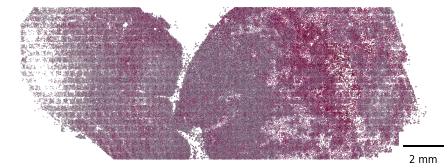

In [57]:
# Core
fig, ax = plt.subplots(1,1,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    SL061,
    sample = 'SL061A',
    key= 'GWscore',
    cluster_key='m-states2',
    clusters = SL061.obs['m-states2'].cat.categories.tolist(),
    cmap='PuRd',
    vmin=vmin,
    vmax=vmax,
    ax=ax,
)
plt.savefig('figures/SL061A_WR.svg', dpi=300, transparent=True)
plt.show()

INFO:root:First filter, 328870 cells left
INFO:root:Zoom filter, 328870 cells left


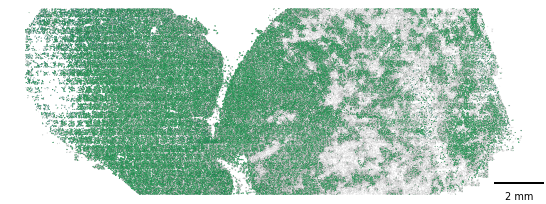

INFO:root:First filter, 328870 cells left
INFO:root:Zoom filter, 328870 cells left


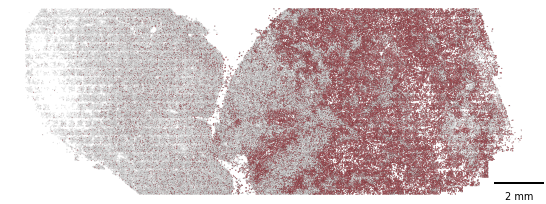

INFO:root:First filter, 328870 cells left
INFO:root:Zoom filter, 328870 cells left


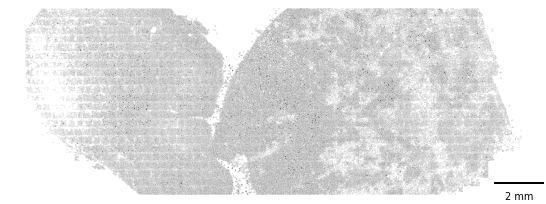

INFO:root:First filter, 328870 cells left
INFO:root:Zoom filter, 328870 cells left


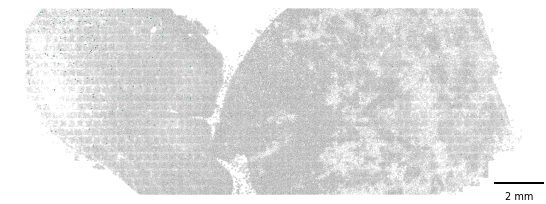

INFO:root:First filter, 328870 cells left
INFO:root:Zoom filter, 328870 cells left


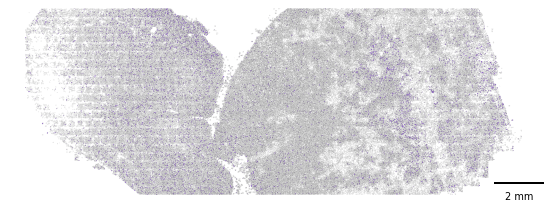

In [91]:
# High
d = {
    'Glia': ['AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 3','AC-like 7','preOPC-like 1'],
    'WR':['GW-like 6','GW-like 8'],
    'Oligo':['Oligodendrocyte 1'], 
    'Astro':['Astrocyte'],
    'Mono':['Mono 1', 'Mono 2'], 
}

for cs in d:
    
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    sp.pl.plot_polygons(
        SL061,
        sample = 'SL061A',
        cluster_key='m-states2',
        clusters = d[cs],
        grey_clusters=SL061.obs['m-states2'].cat.categories.tolist(),
        alpha=.9,
        alpha_gray=.25,
        palette= palette,
        ax=ax,
    )

    plt.savefig(f'figures/SL061A_{cs}.svg', dpi=300, transparent=True)
    plt.show()

INFO:root:First filter, 367612 cells left


GWscore (367612, 878) KeysView(AxisArraysView with keys: spatial, GWscore)
0.61862326 -0.11085235


INFO:root:Zoom filter, 367612 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


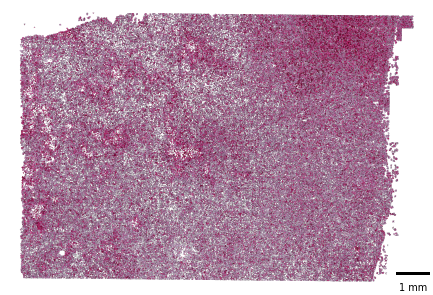

In [64]:
# High
fig, ax = plt.subplots(1,1,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    SL061,
    sample = 'SL061B',
    key= 'GWscore',
    cluster_key='m-states2',
    clusters = SL061.obs['m-states2'].cat.categories.tolist(),
    cmap='PuRd',
    vmin=vmin,
    vmax=vmax,
    ax=ax,
)
plt.savefig('figures/SL061B_WR.svg', dpi=300, transparent=True)
plt.show()

In [81]:
((SL061.obs['m-states2'] == 'Mono 1') & (SL061.obs['Sample'] == 'SL061A')).sum()

536

In [82]:
((SL061.obs['m-states2'] == 'Mono 2') & (SL061.obs['Sample'] == 'SL061A')).sum()

11906

INFO:root:First filter, 367612 cells left
INFO:root:Zoom filter, 367612 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


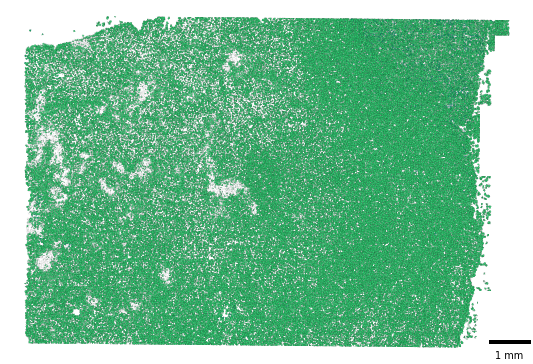

INFO:root:First filter, 367612 cells left
INFO:root:Zoom filter, 367612 cells left


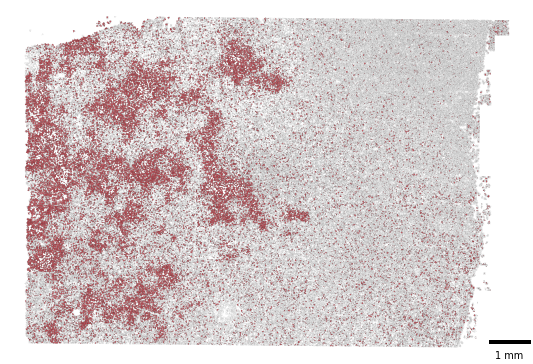

INFO:root:First filter, 367612 cells left
INFO:root:Zoom filter, 367612 cells left


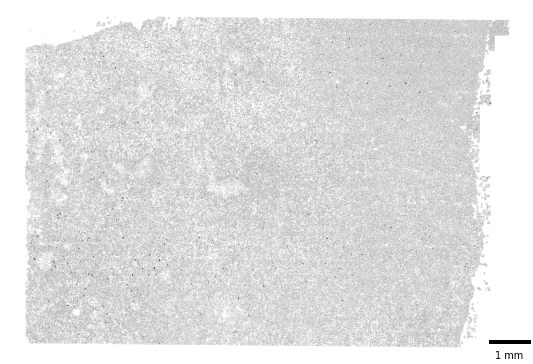

INFO:root:First filter, 367612 cells left
INFO:root:Zoom filter, 367612 cells left


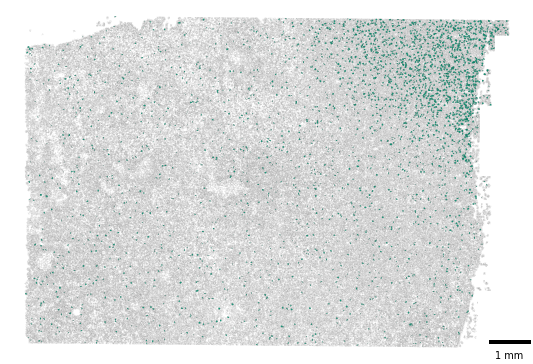

INFO:root:First filter, 367612 cells left
INFO:root:Zoom filter, 367612 cells left


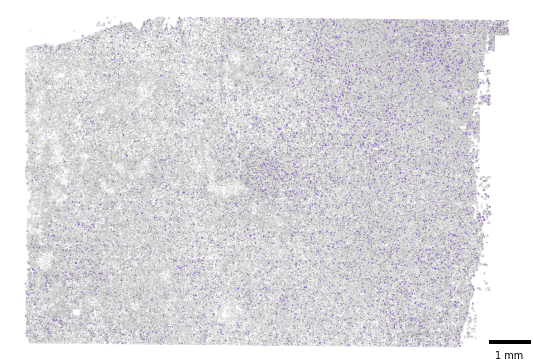

In [92]:
# High
d = {
    'Glia': ['AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 3','AC-like 7','preOPC-like 1'],
    'WR':['GW-like 6','GW-like 8'],
    'Oligo':['Oligodendrocyte 1'], 
    'Astro':['Astrocyte'],
    'Mono':['Mono 1', 'Mono 2'], 
}
# High

for cs in d:
    
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    sp.pl.plot_polygons(
        SL061,
        sample = 'SL061B',
        cluster_key='m-states2',
        clusters = d[cs],
        grey_clusters=SL061.obs['m-states2'].cat.categories.tolist(),
        alpha_gray=.25,
        alpha=.9,
        palette= palette,
        ax=ax,
    )

    plt.savefig(f'figures/SL061B_{cs}.svg', dpi=300, transparent=True)
    plt.show()

INFO:root:First filter, 138436 cells left
INFO:root:Zoom filter, 138436 cells left


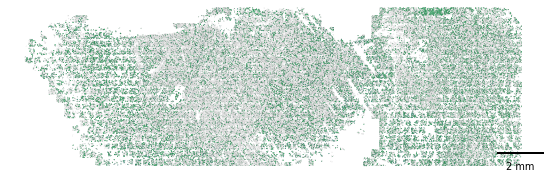

INFO:root:First filter, 138436 cells left
INFO:root:Zoom filter, 138436 cells left


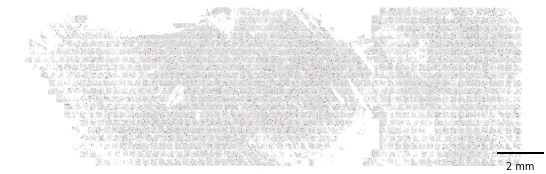

INFO:root:First filter, 138436 cells left
INFO:root:Zoom filter, 138436 cells left


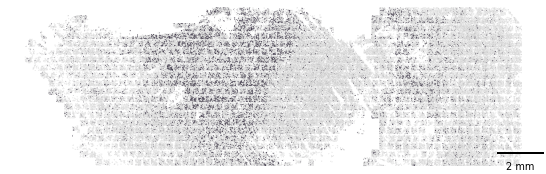

INFO:root:First filter, 138436 cells left
INFO:root:Zoom filter, 138436 cells left


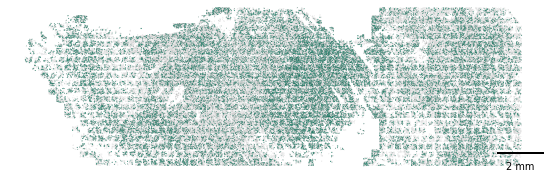

INFO:root:First filter, 138436 cells left
INFO:root:Zoom filter, 138436 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


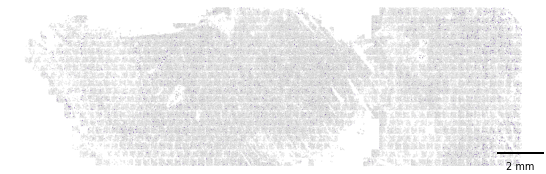

In [93]:
# High
d = {
    'Glia': ['AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 3','AC-like 7','preOPC-like 1'],
    'WR':['GW-like 6','GW-like 8'],
    'Oligo':['Oligodendrocyte 1'], 
    'Astro':['Astrocyte'],
    'Mono':['Mono 1', 'Mono 2'], 
}
for cs in d:
    
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    sp.pl.plot_polygons(
        SL061,
        sample = 'SL061C',
        cluster_key='m-states2',
        clusters = d[cs],
        grey_clusters=SL061.obs['m-states2'].cat.categories.tolist(),
        alpha_gray=.25,
        alpha=.9,
        palette= palette,
        ax=ax,
    )

    plt.savefig(f'figures/SL061C_{cs}.svg', dpi=300, transparent=True)
    plt.show()

INFO:root:First filter, 202966 cells left
INFO:root:Zoom filter, 202966 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


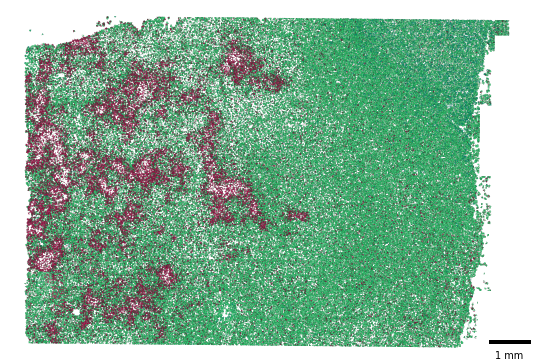

In [65]:
# High
fig, ax = plt.subplots(1,1,figsize=(6,6))
sp.pl.plot_polygons(
    SL061,
    sample = 'SL061B',
    cluster_key='m-states2',
    clusters = [
        'AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 3','AC-like 7',
        'preOPC-like 1', 'Oligodendrocyte 1', 'GW-like 6','GW-like 8', 'Astrocyte','Mono 1', 'Mono 2',
                ],
    palette= palette,
    ax=ax,
)
plt.savefig('figures/SL061B.svg', dpi=300, transparent=True)
plt.show()

INFO:root:First filter, 138436 cells left


GWscore (138436, 878) KeysView(AxisArraysView with keys: spatial, GWscore)
0.5548693 -0.11085236


INFO:root:Zoom filter, 138436 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


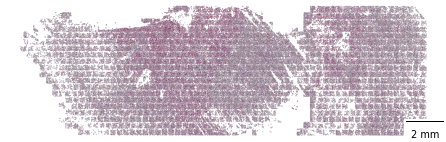

In [69]:
# Low
fig, ax = plt.subplots(1,1,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    SL061,
    sample = 'SL061C',
    key= 'GWscore',
    cluster_key='m-states2',
    clusters = SL061.obs['m-states2'].cat.categories.tolist(),
    cmap='PuRd',
    vmin=vmin,
    vmax=vmax,
    ax=ax
)
plt.savefig('figures/SL061C_WR.svg', dpi=300, transparent=True)
plt.show()

In [ ]:
# High
d = {
    'Glia': ['AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 3','AC-like 7','preOPC-like 1'],
    'WR':['GW-like 6','GW-like 8'],
    'Oligo':['Oligodendrocyte 1'], 
    'Astro':['Astrocyte'],
    'Mono':['Mono 1', 'Mono 2'], 
}
for cs in d:
    
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    sp.pl.plot_polygons(
        SL061,
        sample = 'SL061C',
        cluster_key='m-states2',
        clusters = d[cs],
        grey_clusters=SL061.obs['m-states2'].cat.categories.tolist(),
        palette= palette,
        ax=ax,
    )

    plt.savefig(f'figures/SL061C_{cs}.svg', dpi=300, transparent=True)
    plt.show()

INFO:root:First filter, 74792 cells left
INFO:root:Zoom filter, 74792 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


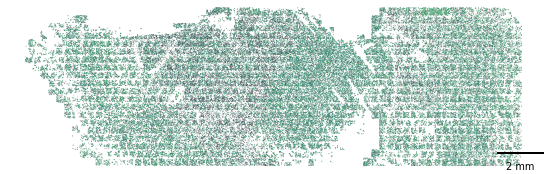

In [68]:
# High
fig, ax = plt.subplots(1,1,figsize=(6,6))
sp.pl.plot_polygons(
    SL061,
    sample = 'SL061C',
    cluster_key='m-states2',
    clusters = [
        'AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 3','AC-like 7',
        'preOPC-like 1', 'Oligodendrocyte 1', 'GW-like 6','GW-like 8', 'Astrocyte','Mono 1', 'Mono 2',
                ],
    palette= palette,
    ax=ax,
)
plt.savefig('figures/SL061C.svg', dpi=300, transparent=True)
plt.show()